In [2]:
import cv2
import pandas as pd
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt

In [3]:
#Read label file
annotation_list = pd.read_csv('./annotation.txt', header=None)

In [6]:
available_ids = [i for i in range(0, 10394)]
X = []
y = []
filenames = []
for i in available_ids:
    pair = annotation_list.iloc[i]
    filename = pair[0]
    label = pair[1]
    image = cv2.imread('./Data/'+filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
#     plt.imshow(image, cmap='gray')
    pixel_offset = [1, 4, 16, 32, 64]
    angle_offset = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
    glcm = graycomatrix(image, pixel_offset, angle_offset)
    
    #Create glcm feature space
    glcm_array = []
    glcm_array.append(graycoprops(glcm, 'energy'))
    glcm_array.append(graycoprops(glcm, 'correlation'))
    glcm_array.append(graycoprops(glcm, 'dissimilarity'))
    glcm_array.append(graycoprops(glcm, 'homogeneity'))
    glcm_array.append(graycoprops(glcm, 'contrast'))
    glcm_array = np.array(glcm_array).flatten()
    #Done
    
    X.append(glcm_array)
    y.append(label)
    filenames.append(filename)
    
    print(i, filename, np.shape(X))

0 20060626.044734614.jpg (1, 125)
1 20060626.044744708.jpg (2, 125)
2 20060626.044754803.jpg (3, 125)
3 20060626.044804897.jpg (4, 125)
4 20060626.044815002.jpg (5, 125)
5 20060626.044825086.jpg (6, 125)
6 20060626.044835181.jpg (7, 125)
7 20060626.044845275.jpg (8, 125)
8 20060626.044855370.jpg (9, 125)
9 20060626.044905464.jpg (10, 125)
10 20060626.044915559.jpg (11, 125)
11 20060626.044925653.jpg (12, 125)
12 20060626.044935748.jpg (13, 125)
13 20060626.044945842.jpg (14, 125)
14 20060626.044955937.jpg (15, 125)
15 20060626.045006032.jpg (16, 125)
16 20060626.045016126.jpg (17, 125)
17 20060626.045026221.jpg (18, 125)
18 20060626.045036315.jpg (19, 125)
19 20060626.045046410.jpg (20, 125)
20 20060626.045056504.jpg (21, 125)
21 20060626.045106599.jpg (22, 125)
22 20060626.045116693.jpg (23, 125)
23 20060626.045126788.jpg (24, 125)
24 20060626.045136882.jpg (25, 125)
25 20060626.045146977.jpg (26, 125)
26 20060626.045157071.jpg (27, 125)
27 20060626.045207166.jpg (28, 125)
28 20060626

In [7]:
#Save data to save runtime
np.save('./GLCM_Components_X.npy', X)
np.save('./GLCM_Components_y.npy', y)
np.save('./filenames.npy', filename)

# Create train and test datasets

(array([ 611.,  161., 1049.,  200.,   58.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

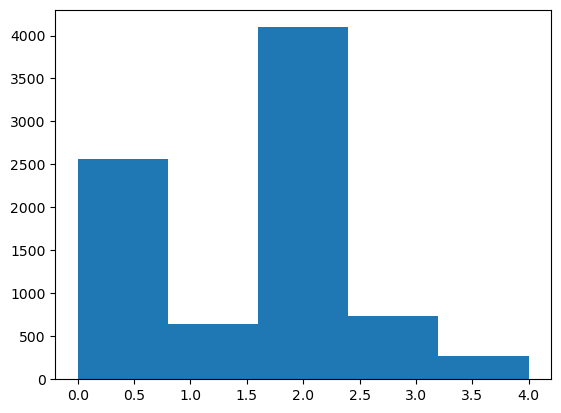

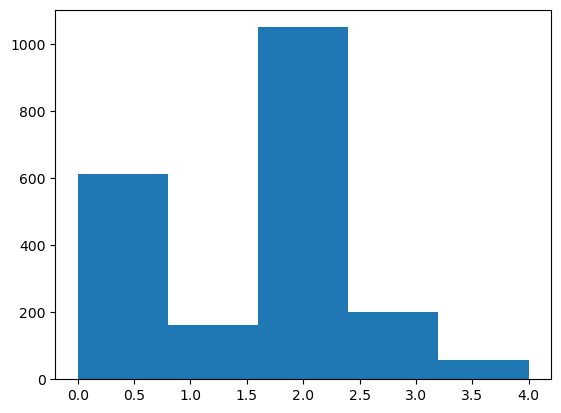

In [7]:
from sklearn.model_selection import train_test_split
X = np.load('./GLCM_Components_X.npy')
y = np.load('./GLCM_Components_y.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
plt.hist(y_train, 5)
plt.figure()
plt.hist(y_test, 5)

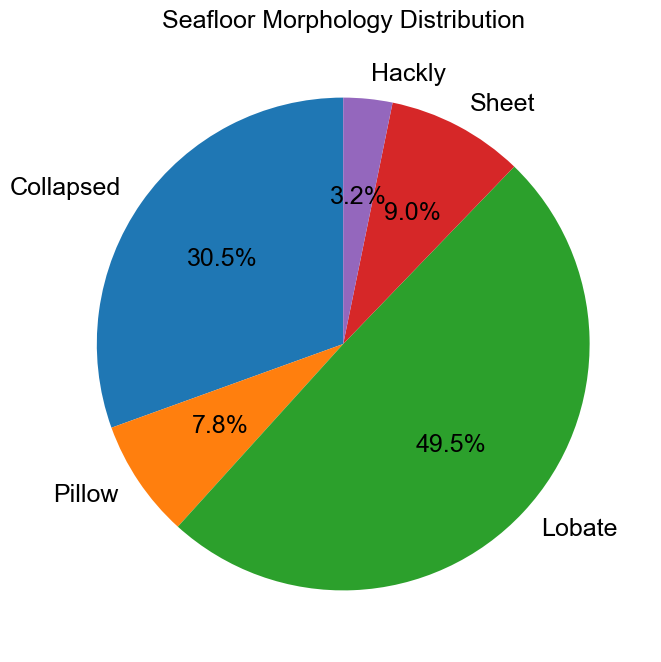

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set Arial font globally
rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 18})

# Load data
X = np.load('./GLCM_Components_X.npy')
y = np.load('./GLCM_Components_y.npy')

# Define class labels (replace with your actual class names if available)
class_labels = ['Collapsed', 'Pillow', 'Lobate', 'Sheet', 'Hackly']

# Calculate class distribution
class_counts = [np.sum(y == i) for i in range(len(class_labels))]

# Define colors (same as histogram colors)
colors = plt.cm.tab10.colors[:len(class_labels)]  # Use Tab10 colormap, first N colors

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    class_counts, 
    labels=class_labels, 
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start pie chart at 90 degrees
    colors=colors       # Use the same color scheme
)
plt.title('Seafloor Morphology Distribution',fontsize=18)
# plt.show()
plt.savefig('./Picture2.png', dpi=400)

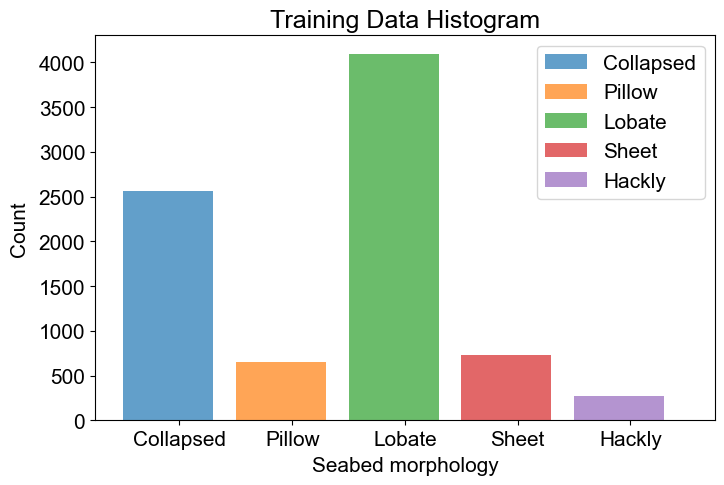

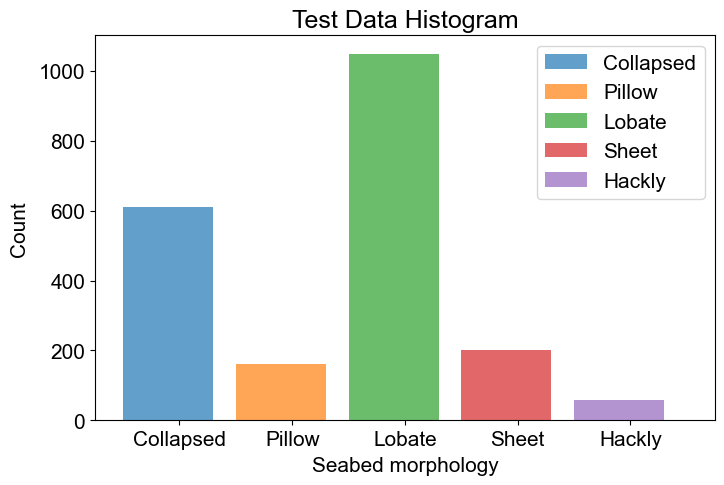

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import rcParams

# Set Arial font globally
rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 15})

# Load data
X = np.load('./GLCM_Components_X.npy')
y = np.load('./GLCM_Components_y.npy')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define class labels (replace with your actual class names if available)
class_labels = ['Collapsed', 'Pillow', 'Lobate', 'Sheet', 'Hackly']

# Define bin edges for wider bins
bin_edges = np.arange(-0.5, len(class_labels) + 0.5, 1)  # Bins centered on each class
bin_centers = np.arange(len(class_labels))

# Plot training data histogram
plt.figure(figsize=(8, 5))
for i, label in enumerate(class_labels):
    plt.hist(y_train[y_train == i], bins=bin_edges, alpha=0.7, label=label, width=0.8)  # Different colors for each class
plt.title('Training Data Histogram')
plt.xlabel('Seabed morphology', labelpad=5)
plt.ylabel('Count', labelpad=7)
plt.xticks(bin_centers, class_labels)  # Set x-axis labels
plt.legend()
# plt.show()
plt.savefig('./Picture3.png', dpi=400)
# Plot testing data histogram
plt.figure(figsize=(8, 5))
for i, label in enumerate(class_labels):
    plt.hist(y_test[y_test == i], bins=bin_edges, alpha=0.7, label=label, width=0.8)  # Different colors for each class
plt.title('Test Data Histogram')
plt.xlabel('Seabed morphology', labelpad=5)
plt.ylabel('Count',labelpad=7)
plt.xticks(bin_centers, class_labels)  # Set x-axis labels
plt.legend()
# plt.show()
plt.savefig('./Picture4.png', dpi=400)

# Assess different algorithms

# Random forest classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=60, random_state=42)
rf.fit(X_train, y_train)
print('Accuracy(%) is: '+str(rf.score(X_test, y_test)*100))

Accuracy(%) is: 83.40548340548341


# Gradient boost

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
print('Accuracy(%) is: '+str(gb.score(X_test, y_test)*100))

Accuracy(%) is: 80.95238095238095


# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print('Accuracy(%) is: '+str(lr.score(X_test, y_test)*100))

Accuracy(%) is: 81.77008177008177


/Users/banerjee/opt/anaconda3/envs/bluewhale/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# k-NN

Accuracy(%) is: 82.73208273208273 for k = 5


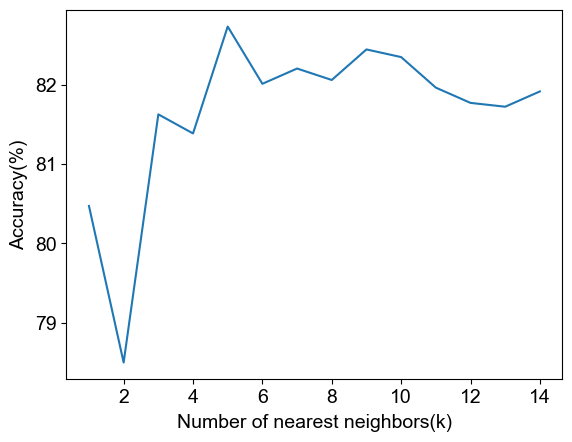

In [10]:
from matplotlib import rcParams

# Set Arial font globally
rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 14})

from sklearn.neighbors import KNeighborsClassifier
accuracy_scores = []
for i in range(1, 15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    accuracy_scores.append(neigh.score(X_test, y_test))
print('Accuracy(%) is: '+str(np.max(accuracy_scores)*100)+ ' for k = '+str(np.argmax(accuracy_scores)+1))
plt.plot(np.arange(0, 14)+1, np.array(accuracy_scores)*100)
plt.xlabel('Number of nearest neighbors(k)', labelpad=5)
plt.ylabel('Accuracy(%)',labelpad=5)
plt.savefig('./KNN2.png', dpi=400)

# Support Vector Machines(SVM)

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
print('Accuracy(%) is: '+str(svm.score(X_test, y_test)*100))

Accuracy(%) is: 80.61568061568062


# Neural Net

In [191]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=100)
mlp.fit(X_train, y_train)
print('Accuracy(%) is: '+str(mlp.score(X_test, y_test)*100))

Accuracy(%) is: 77.39297739297739


# Confusion matrix on test dataset

(array([0.87638669, 0.6918239 , 0.8427065 , 0.77966102, 0.60606061]), array([0.90507365, 0.68322981, 0.914204  , 0.46      , 0.34482759]), array([0.89049919, 0.6875    , 0.87700046, 0.57861635, 0.43956044]), array([ 611,  161, 1049,  200,   58]))
83.40548340548341


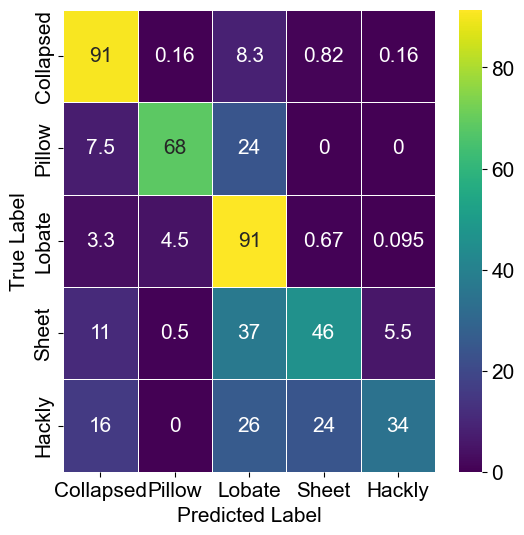

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
y_test_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_test_predict)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cmn*100, annot=True, linewidths=0.5, ax=ax, cmap="viridis", xticklabels=['Collapsed', 'Pillow', 'Lobate', 'Sheet', 'Hackly'], yticklabels=['Collapsed', 'Pillow', 'Lobate', 'Sheet', 'Hackly'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('./conf_matrix.png', dpi=400)

print(precision_recall_fscore_support(y_test, y_test_predict, average=None))

print(accuracy_score(y_test, y_test_predict)*100)

How many errors are true errors

In [28]:
X = np.load('./GLCM_Components_X.npy')
y = np.load('./GLCM_Components_y.npy')
y_pred = rf.predict(X)

zero_matches = np.argwhere(y_pred!=y).flatten()
print(y[zero_matches], y_pred[zero_matches])

df = pd.DataFrame(columns=['Filename', 'Actual type', 'Predicetd type'])
for i in zero_matches:
     df.loc[i] = [annotation_list.iloc[i][0], y[i], y_pred[i]]
print(df)
df.to_csv('./mismatched_images.csv')
# for i in range(0, 10394):
#     filenom = annotation_list.iloc[i][0]
#     y_pred = rf.predict(X[i])
# print(y_pred)

[3 3 3 3 0 0 2 2 2 3 3 3 0 0 2 2 2 0 0 0 3 3 3 0 0 0 0 2 0 2 0 3 2 0 3 1 1
 3 4 3 3 3 3 3 3 3 1 1 1 1 2 2 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 2 0 2 3
 3 2 2 2 2 2 2 2 2 3 0 2 1 1 1 2 2 1 2 2 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 2 2
 2 2 1 1 2 3 1 1 1 1 3 4 3 4 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3
 4 3 4 4 3 2 3 2 3 3 3 0 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 1 1 1 1 1 1 4 4 4 4
 3 4 1 2 2 1 0 0 0 0 0 3 4 3 4 4 3 3 3 3 3 3 3 3 1 1 1 1 1 1 4 4 4 4 3 4 3
 1 2 2 2 1 1 1 2 0 2 2 4 4 2 2 2 2 1 1 2 2 2 2 1 2 1 4 3 3 3 4 4 1 1 2 2 2
 2 2 1 2 1 1 1 2 2 2 1 3 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 2 2 3 0 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 4 2 2 2 4 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] [2 2 2 2 2 2 0 0 0 2 0 2 2 3 3 0 1 2 2 2 2 2 2 2 2 3 2 0 2 0 3 0 1 2 2 2 0
 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0 2 3 2
 2 0 3 3 0 0 3 1 0 2 2 1 2 2 2 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 0 0
 0 0 0 2 0 2 2 2 2 2 2 2 2 3 2 4 2 2 2 4 4 4 4 2 2 4 4 2 2 2 4 2 2 2 2 0